# Graphs

- [Introduction](#intro)

- [Definitions](#def)

- [Types of Graphs](#types)
    - [Erdos-Rényi](#erdos)
        - [Degree distribution](#erdosdegree)
        - [Descriptive statistics](#erdosstatistics)
    - [Barabasi-Albert](#barabasi)
        - [Degree distribution](#barabasidegree)
        - [Descriptive statistics](#barabasistatistics)

- [Graph algorithms](#algorithms)
    - [Pathfinding and Graph Search Algorithms](#algorithmsoverview)
        - [Pathfinding algorithms](#pathfinding)
        - [Search Algorithms](#search)
    - [Community Detection](#community)
        - [Louvain Modularity](#louvain)
        - [Strongly Connected Components](#scc)
        - [Weak Connected Components](#wcc)
        - [Hierarchical Clustering](#hc)
        - [Clustering Coefficient](#cc)
    - [Centrality algorithms](#centrality)
        - [PageRank Algorithm](#pagerank)
        - [Degree Centrality](#dc)
        - [Eigenvector Centrality](#ec)
        - [Closeness Centrality](#cce)
        - [Betweenness Centrality](#bc)

- [Graph Learning](#graphlearning)
    - [Link Prediction](#lp)
    - [Similarity Scores](#ss)
        - Common Neighbors
        - Jaccard Coefficient
        - Adamic-Adar index
        - Preferential attachment
    - [Performance Metrics](#pm)
    - [Node Labeling](#nl)
    - [Graph Embedding](#ge)
        - [Node Embedding](#nodeembedding)
        - [Edge Embedding](#edgeembedding)
        - [Graph Embedding](#graphembedding)

- [Graph Convolutional Networks](#gcn)
    - [A Simple Propagation Rule](#gcnexample)

<div id='intro' />

## Introduction

What kind of analysis can we perform on a graph?

- study topology and connectivity
- community detection
- identification of central nodes
- predict missing nodes
- predict missing edges

Some use cases for graph algorithms

- real-time fraud detection
- real-time recommendations
- streamline regulatory compliance
- management and monitoring of complex networks
- identity and access management
- social applications/features


<div id='def' />

## Definitions

A graph $G=(V, E)$ is made of a set of

- Nodes (also called vertices $V$).
- Edges $E \subseteq V×V$. An edge $(i,j) \in E$ links nodes $i$ and $j$.
- $i$ and $j$ are said to be neighbors.

A **degree** of a node is its number of neighbors.
    
A graph is **complete** if all nodes have n−1 neighbors. This would mean that all nodes are connected in every possible way.

A **path** from $i$ to $j$ is a sequence of edges that goes from $i$ to $j$. This path has a length equal to the number of edges it goes through.

The **diameter** of a graph is the length of the longest path among all the shortest path that link any two nodes.

The **geodesic** path is the shortest path between 2 nodes.

If all the nodes can be reached from each other by a given path, they form a **connected component**. A graph is **connected** is it has a single connected component.

A graph is **directed** if edges are ordered pairs. In this case, the “in-degree” of $i$ is the number of incoming edges to $i$, and the “out-degree” is the number of outgoing edges from $i$.

A graph is **cyclic** if you can return to a given node. On the other hand, it is acyclic if there’s at least one node to which you can’t return.

A graph can be **weighted** if we put weights on either nodes or relationships.

A graph is **sparse** if the number of edges is large compared to the number of nodes. On the other hand, it is said to be dense if there are many edges between the nodes.

In [1]:
import random
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

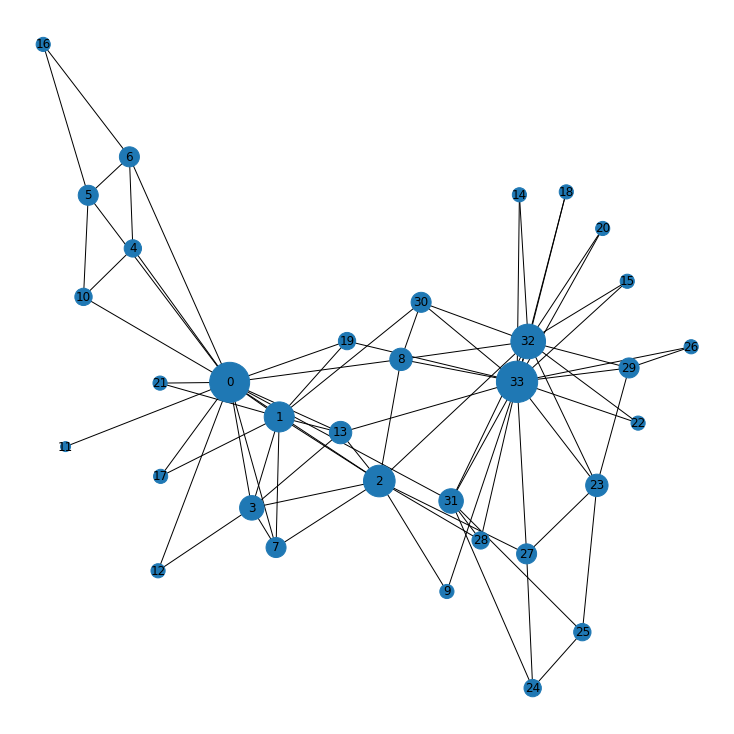

In [2]:
G_karate = nx.karate_club_graph()
pos = nx.spring_layout(G_karate)
d = dict(nx.degree(G_karate))

plt.figure(figsize=(10, 10))
nx.draw(G_karate, cmap=plt.get_cmap("rainbow"), with_labels=True, pos=pos, nodelist=d.keys(), node_size=[v * 100 for v in d.values()])

Number of nodes: 34
Number of edges: 78
Maximum degree: 17
Minimum degree: 1
Average degree: 4.588235294117647
Median degree: 3.0


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


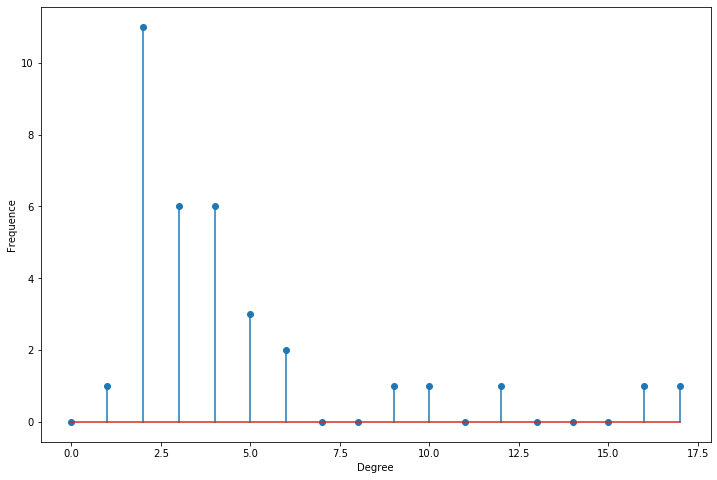

In [3]:
def graphs_stats(graph):
    n_nodes = graph.number_of_nodes()
    n_edges = graph.number_of_edges()
    
    degree_sequence = list(graph.degree())
    
    avg_degree = np.mean(np.array(degree_sequence)[:, 1])
    med_degree = np.median(np.array(degree_sequence)[:, 1])
    
    max_degree = max(np.array(degree_sequence)[:, 1])
    min_degree = np.min(np.array(degree_sequence)[:, 1])
        
    print("Number of nodes: " + str(n_nodes))
    print("Number of edges: " + str(n_edges))
    print("Maximum degree: " + str(max_degree))
    print("Minimum degree: " + str(min_degree))
    print("Average degree: " + str(avg_degree))
    print("Median degree: " + str(med_degree))
    
    
def degree_hist(graph):
    degree_freq = np.array(nx.degree_histogram(graph)).astype("float")
    plt.figure(figsize=(12, 8))
    plt.stem(degree_freq)
    plt.ylabel("Frequence")
    plt.xlabel("Degree")
    
graphs_stats(G_karate)
degree_hist(G_karate)

<div id='types' />

## Types of Graphs

<div id='erdos' />

### Erdos-Rényi

In an Erdos-Rényi model, we build a random graph model with $n$ nodes. The graph is generated by drawing an edge between a pair of nodes $(i,j)$ independently with probability $p$. We therefore have 2 parameters: the number of nodes $n$ and the probability $p$.

<div id='erdosdegree' />

#### Degree distribution

Let $p_k$ the probability that a randomly selected node has a degree $k$. Due to the random way the graphs are built, the distribution of the degrees of the graph is **binomial**. The distribution of the number of degrees per node should be really close to the mean. The probability to observe a high number of nodes decreases exponentially.

<div id='erdosstatistics' />

#### Descriptive statistics

- The average degree is given by $n×p$. With $p=0.2$ and $n=200$, we are centered around 40.

- The degree expectation is given by $(n−1)p$

- The maximum degree is concentrated around the average.

Number of nodes: 200
Number of edges: 3949
Maximum degree: 56
Minimum degree: 25
Average degree: 39.49
Median degree: 39.5


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


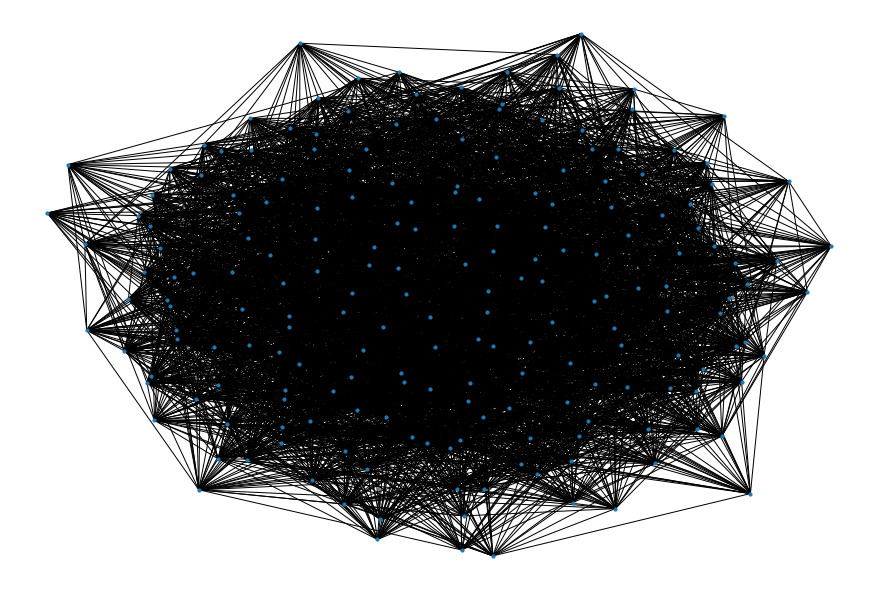

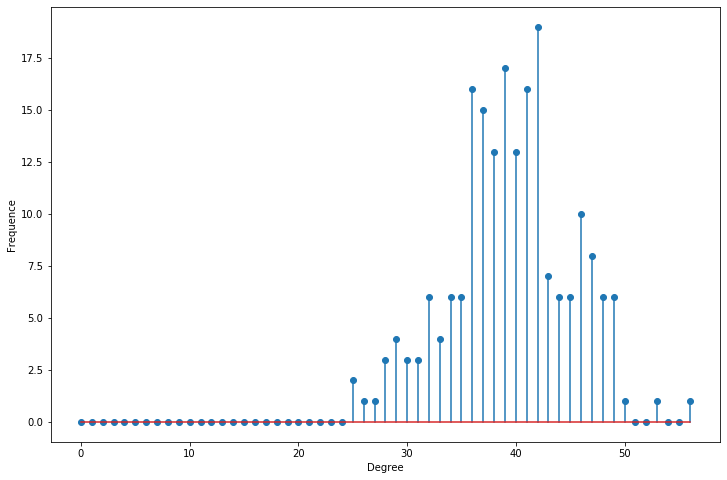

In [4]:
n = 200
p = 0.2
G_erdos = nx.erdos_renyi_graph(n, p, seed=100)
plt.figure(figsize=(12, 8))
nx.draw(G_erdos, node_size=10)

graphs_stats(G_erdos)
degree_hist(G_erdos)

<div id='barabasi' />

### Barabasi-Albert

In a Barabasi-Albert model, we build a random graph model with $n$ nodes with a preferential attachment component. The graph is generated by the following algorithm

1. With a probability $p$, move to the second step. Else, move to the third step.

2. Connect a new node to existing nodes chosen uniformly at random.

3. Connect the new node to $n$ existing nodes with a probability proportional to their degree.

The aim of such graph is to model preferential attachment, which is often observed in real networks.

<div id='barabasidegree' />

#### Degree distribution

Let $p_k$ the probability that a randomly selected node has a degree $k$. The degree distribution follows a power-law

$$ p_k \propto k^{- \alpha} $$

The distribution is now heavy-tailed. There is a large number of nodes that have a small degree, but a significant number of nodes have a high degree.

<div id='barabasistatistics' />

#### Descriptive statistics

- The average degree is constant if $\alpha \leq 2$, else, it diverges.

- The maximum degree is of the following order $O(n^{\frac{1}{\alpha -1}})$

Number of nodes: 200
Number of edges: 591
Maximum degree: 37
Minimum degree: 3
Average degree: 5.91
Median degree: 4.0


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


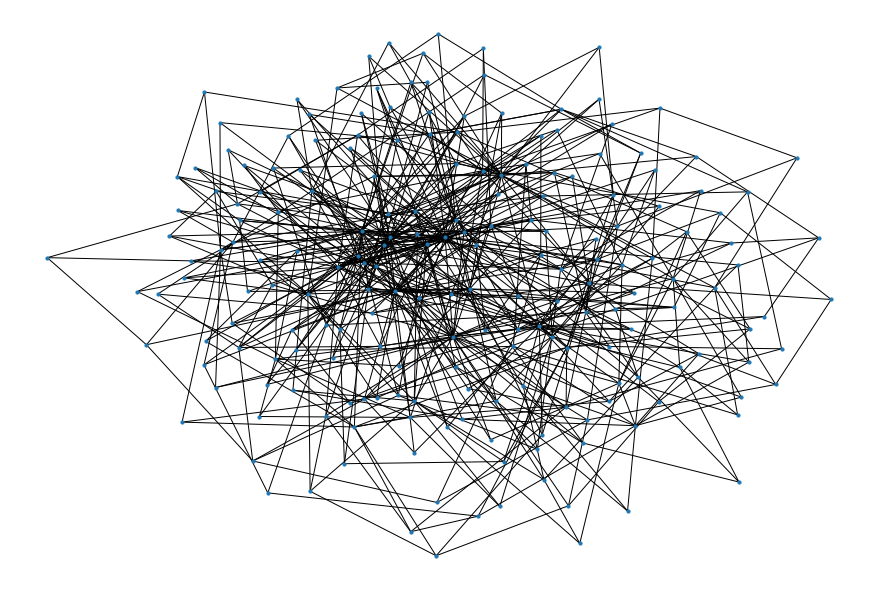

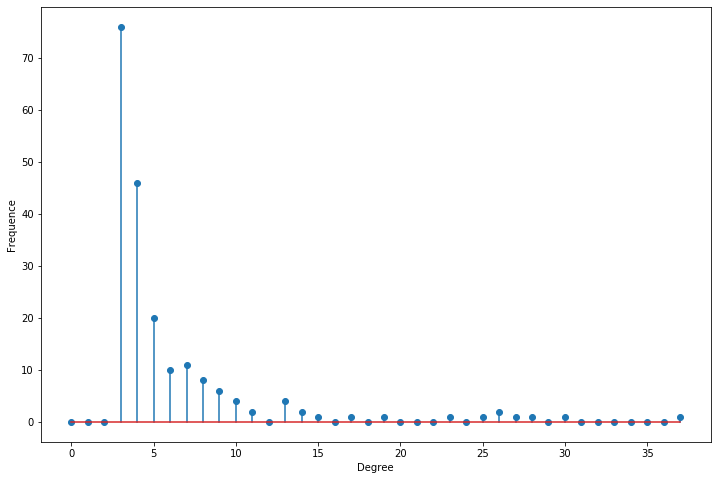

In [5]:
n = 200
m = 3
G_barabasi = nx.barabasi_albert_graph(n, m)
plt.figure(figsize=(12, 8))
nx.draw(G_barabasi, node_size=10)

graphs_stats(G_barabasi)
degree_hist(G_barabasi)

<div id='algorithms' />

## Graph algorithms

There are 3 main categories of graph algorithms that are currently supported in most frameworks (`networkx` in Python, or in `Neo4J` for example)

- **Pathfinding**: identify the optimal path depending on availability and quality for example. We’ll also include search algorithms in this category. This can be used to identify the quickest route or traffic routing for example.

- **Centrality**: determine the importance of the nodes in the network. This can be used to identify influencers in social media for example or identify potential attack targets in a network.

- **Community detection**: evaluate how a group is clustered. This can be used to segment customers and detect fraud for example.

<div id='algorithmsoverview' />

### Pathfinding and Graph Search Algorithms

<div id='pathfinding' />

#### Pathfinding algorithms

Try to find the shortest path between two nodes by minimizing the number of hops.

- Shortest Path: calculates the shortest weighted (if the graph is weighted) path between a pair of nodes. It is used to identify optimal driving directions or degree of separation between two people on a social network for example. The are many ways to compute the shortest path in a graph, including the **Dijkstra’s algorithm**, the default algorithm in `networkx`.

- The Single Source Shortest Path (SSSP) finds the shortest path between a given node and all other nodes in the graph. It is often used for routing protocol for IP networks for example.

- The All Pairs Shortest Path (APSP) algorithm finds the shortest path between all pairs of nodes. Although providing similar results, it is quicker than calling the Single Source Shortest Path for every pair of nodes. This algorithm can typically be used to determine traffic load expected on different segments of a transportation grid.

- A Minimum Spanning Tree is a subgraph of the graph (a tree) with the minimum sum of edge weights that connects all nodes within a graph. Minimum spanning tree should be applied to undirected graphs.

<div id='search' />

#### Search Algorithms

Does not give the shortest path. Instead, they explore graphs considering neighbors or depths of a graph. This can be used for information retrieval. There are two main graph search algorithms

- Breadth-First Search (BFS) which explores each node’s neighbor first, then neighbors of the neighbors...

- Depth-First Search (DFS) which tries to go down a path as much as possible, and visit new neighbors if possible.

In [6]:
nx.shortest_path(G_karate) # Shortest Path

{0: {0: [0],
  1: [0, 1],
  2: [0, 2],
  3: [0, 3],
  4: [0, 4],
  5: [0, 5],
  6: [0, 6],
  7: [0, 7],
  8: [0, 8],
  10: [0, 10],
  11: [0, 11],
  12: [0, 12],
  13: [0, 13],
  17: [0, 17],
  19: [0, 19],
  21: [0, 21],
  31: [0, 31],
  30: [0, 1, 30],
  9: [0, 2, 9],
  27: [0, 2, 27],
  28: [0, 2, 28],
  32: [0, 2, 32],
  16: [0, 5, 16],
  33: [0, 8, 33],
  24: [0, 31, 24],
  25: [0, 31, 25],
  23: [0, 2, 27, 23],
  14: [0, 2, 32, 14],
  15: [0, 2, 32, 15],
  18: [0, 2, 32, 18],
  20: [0, 2, 32, 20],
  22: [0, 2, 32, 22],
  29: [0, 2, 32, 29],
  26: [0, 8, 33, 26]},
 1: {1: [1],
  0: [1, 0],
  2: [1, 2],
  3: [1, 3],
  7: [1, 7],
  13: [1, 13],
  17: [1, 17],
  19: [1, 19],
  21: [1, 21],
  30: [1, 30],
  4: [1, 0, 4],
  5: [1, 0, 5],
  6: [1, 0, 6],
  8: [1, 0, 8],
  10: [1, 0, 10],
  11: [1, 0, 11],
  12: [1, 0, 12],
  31: [1, 0, 31],
  9: [1, 2, 9],
  27: [1, 2, 27],
  28: [1, 2, 28],
  32: [1, 2, 32],
  33: [1, 13, 33],
  16: [1, 0, 5, 16],
  24: [1, 0, 31, 24],
  25: [1, 0, 31,

In [7]:
list(nx.all_pairs_shortest_path_length(G_karate)) # All Pairs Shortest Path (APSP)

[(0,
  {0: 0,
   1: 1,
   2: 1,
   3: 1,
   4: 1,
   5: 1,
   6: 1,
   7: 1,
   8: 1,
   10: 1,
   11: 1,
   12: 1,
   13: 1,
   17: 1,
   19: 1,
   21: 1,
   31: 1,
   30: 2,
   9: 2,
   27: 2,
   28: 2,
   32: 2,
   16: 2,
   33: 2,
   24: 2,
   25: 2,
   23: 3,
   14: 3,
   15: 3,
   18: 3,
   20: 3,
   22: 3,
   29: 3,
   26: 3}),
 (1,
  {1: 0,
   0: 1,
   2: 1,
   3: 1,
   7: 1,
   13: 1,
   17: 1,
   19: 1,
   21: 1,
   30: 1,
   4: 2,
   5: 2,
   6: 2,
   8: 2,
   10: 2,
   11: 2,
   12: 2,
   31: 2,
   9: 2,
   27: 2,
   28: 2,
   32: 2,
   33: 2,
   16: 3,
   24: 3,
   25: 3,
   23: 3,
   14: 3,
   15: 3,
   18: 3,
   20: 3,
   22: 3,
   29: 3,
   26: 3}),
 (2,
  {2: 0,
   0: 1,
   1: 1,
   3: 1,
   7: 1,
   8: 1,
   9: 1,
   13: 1,
   27: 1,
   28: 1,
   32: 1,
   4: 2,
   5: 2,
   6: 2,
   10: 2,
   11: 2,
   12: 2,
   17: 2,
   19: 2,
   21: 2,
   31: 2,
   30: 2,
   33: 2,
   23: 2,
   24: 2,
   14: 2,
   15: 2,
   18: 2,
   20: 2,
   22: 2,
   29: 2,
   16: 3,
   25: 3,
 

In [8]:
from networkx.algorithms import tree

mst = tree.minimum_spanning_edges(G_karate, algorithm='prim', data=False)
edgelist = list(mst)
sorted(edgelist)

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 10),
 (0, 11),
 (0, 12),
 (0, 13),
 (0, 17),
 (0, 19),
 (0, 21),
 (0, 31),
 (1, 30),
 (2, 9),
 (2, 27),
 (2, 28),
 (2, 32),
 (5, 16),
 (8, 33),
 (27, 23),
 (31, 24),
 (31, 25),
 (32, 14),
 (32, 15),
 (32, 18),
 (32, 20),
 (32, 22),
 (32, 29),
 (33, 26)]

<div id='community' />

### Community Detection

Community detection partitions the nodes into a several groups according to a given quality criterion. It is typically used to identify social communities, customers behaviors or web pages topics.

A community is a set of connected nodes. There is however no universal definition that one can give to define communities, although the nodes within a community should be densely connected.

A common algorithm to find communities is the **Girvan Newman** algorithm. It identifies communities by progressively removing edges within the network. We’ll refer to betweenness as the "edge betweenness". It is a score proportional to the number of shortest paths between pairs of nodes that go through this edge.

The steps of this algorithm are the following

1. Compute the betweenness of all existing edges in the network.
2. Remove the edge with the highest betweenness.
3. Recompute the betweenness of all edges after the removal of this edge.
4. Steps 2 and 3 are repeated until no edges remain.

In [9]:
import itertools
from networkx.algorithms import community

# This heads a list of the nodes that belong to each community 
# k=1 means we expect 2 communities
k = 1
comp = community.girvan_newman(G_karate)
for communities in itertools.islice(comp, k):
    print(tuple(sorted(c) for c in communities))

([0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21], [2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33])


As stated above, this method does not really scale. For this reason, methods such as the Louvain method have been developed. Such methods are however really long to run on large graphs.

<div id='louvain' />

#### Louvain Modularity

Before defining the Louvain method, it is important to introduce the notion of **modularity**. Modularity is a measure of how well groups have been partitioned into clusters.

The pseudo-code of the Louvain method is the following

1. Assign a community to each node at first.
2. Alternate the next 2 steps until convergence.
3. Create a new community with neighboring nodes to maximize modularity
4. Create a new weighted graph. Communities of the previous step become nodes of the graph.

There is no theoretical guarantee of the Louvain method, but it works well in practice. Louvain’s method is present as a sub-project of `networkx`.

In [10]:
#!pip install python-louvain

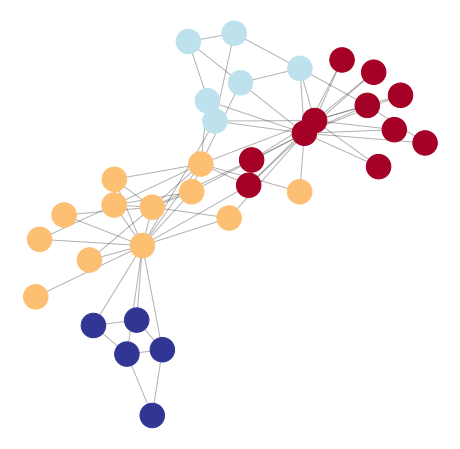

In [11]:
import community

partition = community.best_partition(G_karate)
pos = nx.spring_layout(G_karate)
plt.figure(figsize=(8, 8))
plt.axis("off")
nx.draw_networkx_nodes(G_karate, pos, node_size=600, cmap=plt.cm.RdYlBu, node_color=list(partition.values()))
nx.draw_networkx_edges(G_karate, pos, alpha=0.3)
plt.show(G_karate)

<div id='scc' />

#### Strongly Connected Components

The Strongly Connected Components (SCC) algorithm finds groups of connected nodes in a directed graph. Note that each node must be reachable in both directions from any other node in the same group.

It is often used early in a graph analysis process to give us an idea of how our graph is structured, for example, to explore financial statements data when we look at who owns shared in what company (think about Panama papers for example).

<div id='wcc' />

#### Weak Connected Components (Union Find)

The Weakly Connected Components, or Union Find algorithm finds sets of connected nodes in a directed graph where each node is reachable from any other node in the same set.

It only needs a path to exist between pairs of nodes in one direction, whereas SCC needs a path to exist in both directions. As with SCC, Union Find is often used early in analysis to understand a graph’s structure.

Union-Find is a pre-processing step that is essential before any kind of algorithm, to understand the graph’s structure.

In [12]:
# Test for connected directed graphs
#nx.is_weakly_connected(G)
#nx.is_weakly_connected(G)

# Test undirected graphs
nx.is_connected(G_karate)

True

<div id='hc' />

#### Hierarchical Clustering

In hierarchical clustering, we build a **hierarchy** of clusters. We represent the clusters under a form a dendrogram.

The idea is to analyze community structures at different scales. We usually build the dendrogram bottom-up. We start with a cluster at each node and merge the two "closest" nodes. But how do we measure if clusters are close? We use similarity distances... Let $d(i,j)$ be the length of the shortest path between $i$ and $j$

- maximum linkage $D(C_1, C_2) = min_{i \in C_1, j \in C_2} d(i,j)$
- average linkage $D(C_1, C_2) = \frac{1}{|C_1||C_2|} \sum_{i \in C_1, j \in C_2} d(i,j)$
- centroid linkage $D(C_1, C_2) = d(G_1,G_2)$ where $G_1$ and $G_2$ are the centers of $C_1,C_2$

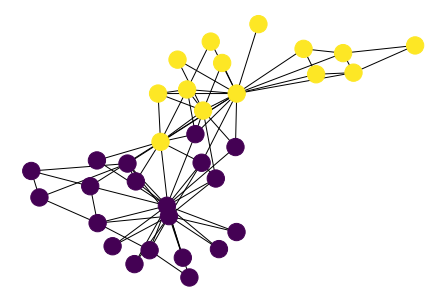

In [13]:
from sklearn.cluster import AgglomerativeClustering

# Before applying hierarchical clustering
# we need to define the matrix of distances between each node
n = G_karate.number_of_nodes()
pcc_longueurs = list(nx.all_pairs_shortest_path_length(G_karate))
distances = np.zeros((n, n))
# distances[i, j] is the length of the shortest path between i and j
for i in range(n):
    for j in range(n):
        distances[i, j] = pcc_longueurs[i][1][j]

# identify hierarchical clustering
clustering = AgglomerativeClustering(n_clusters=2, linkage='average', affinity='precomputed').fit_predict(distances)

nx.draw(G_karate,  node_color=clustering)

<div id='cc' />

#### Clustering Coefficient

The clustering coefficient measures how well two nodes tend to cluster together.

The local clustering coefficient is a ratio of the number of triangles centered at node $i$ over the number of triples centered at node $i$, $C_i = \frac{triangles_i}{triples_i}$. In some sense, it measures how close a node $i$ and its neighbors are to being a complete graph.

A global coefficient measures the density of triangles (local clusters) in the graph $CCC = \frac{1}{n} \sum_i C_i$.

- For Erdos-Rényi random graphs, $CC =C_i=p$ where $p$ the probability defined in the previous section.
- For Baràbasi-Albert random graphs, the global clustering coefficient follows a power law depending on the number of nodes. The average clustering coefficient of nodes with degree $k$ is proportional to the inverse of $k$, $C(k) \propto k^{-1}$

Nodes with a low degree are connected to other nodes in their community. Nodes with high degrees are linked to nodes in different communities.

In [14]:
# List of local clustering coefficients
ci = list(nx.clustering(G_barabasi).values())

print("Local clustering coefficients\n", ci, "\n")
print("Global clustering coefficients", np.mean(ci))

Local clustering coefficients
 [0.05, 0.07602339181286549, 0.14285714285714285, 0.05517241379310345, 0.042042042042042045, 0.055384615384615386, 0.044444444444444446, 0.042735042735042736, 0.051470588235294115, 0.043076923076923075, 0.0641025641025641, 0.09090909090909091, 0.0641025641025641, 0.03557312252964427, 0.031746031746031744, 0.01282051282051282, 0.1, 0.1111111111111111, 0.09523809523809523, 0.0761904761904762, 0.09523809523809523, 0.14285714285714285, 0.07692307692307693, 0.054945054945054944, 0, 0.1111111111111111, 0.16666666666666666, 0.1, 0.09523809523809523, 0.03571428571428571, 0.08791208791208792, 0, 0.6666666666666666, 0, 0.06666666666666667, 0.2, 0.06666666666666667, 0.3, 0.03636363636363636, 0.07142857142857142, 0.03571428571428571, 0.14285714285714285, 0.027777777777777776, 0.16666666666666666, 0.16666666666666666, 0.3333333333333333, 0, 0.06666666666666667, 0.08333333333333333, 0.06666666666666667, 0.027777777777777776, 0, 0.3333333333333333, 0.06666666666666667, 0

<div id='centrality' />

### Centrality algorithms

Centrality measures how important a node is. This is not a clear definition, but it’s useful when we want to identify important web pages, bottlenecks in transportation networks...

A **walk** is a path which can go through the same node several times. Centrality measures vary with the type of walk considered and the way of counting them.

<div id='pagerank' />

#### PageRank Algorithm

PageRank estimates a current node’s importance from its linked neighbors and then again from their respective neighbors.

Although popularized by Google, it’s a way of detecting influential nodes in any network. It is for example used to suggest connections on social networks.

PageRank is computed by either iteratively distributing one node’s rank (originally based on the degree) over its neighbors or by randomly traversing the graph and counting the frequency of hitting each node during these walks.

PageRank is usually computed on directed graphs. However, it will also execute on undirected graphs by converting each edge in the directed graph to two edges.

In [15]:
nx.pagerank(G_karate, alpha=0.9)
# alpha is the damping parameter, by default 0.85

{0: 0.09923208031303203,
 1: 0.0543403155825792,
 2: 0.05919704684187155,
 3: 0.036612460562853694,
 4: 0.02129205163493875,
 5: 0.028358863602879276,
 6: 0.028358863602879276,
 7: 0.024777139411941047,
 8: 0.030411546757834793,
 9: 0.013746095283556584,
 10: 0.02129205163493875,
 11: 0.008523220243546811,
 12: 0.014015169158033743,
 13: 0.030254309009995452,
 14: 0.013916466828162465,
 15: 0.013916466828162465,
 16: 0.015703158296594022,
 17: 0.01395744128254017,
 18: 0.013916466828162465,
 19: 0.019434610880594574,
 20: 0.013916466828162465,
 21: 0.01395744128254017,
 22: 0.013916466828162465,
 23: 0.03165330491466868,
 24: 0.02045532726885293,
 25: 0.020410702877569672,
 26: 0.014276670024478019,
 27: 0.025579985022944167,
 28: 0.01938173195115044,
 29: 0.02603805549234405,
 30: 0.024824588072166538,
 31: 0.037572665335286734,
 32: 0.07330616298815512,
 33: 0.10345460652842152}

<div id='dc' />

#### Degree Centrality

Degree Centrality counts the number of walks of length 1 ending at node $i$. It measures incoming and outgoing relationship. It is given by $C(X_i)=d_i$. Degree Centrality is used to identify the most influential persons on a social network for example.

In [16]:
c_degree = nx.degree_centrality(G_karate)
c_degree = list(c_degree.values())
c_degree

[0.48484848484848486,
 0.2727272727272727,
 0.30303030303030304,
 0.18181818181818182,
 0.09090909090909091,
 0.12121212121212122,
 0.12121212121212122,
 0.12121212121212122,
 0.15151515151515152,
 0.06060606060606061,
 0.09090909090909091,
 0.030303030303030304,
 0.06060606060606061,
 0.15151515151515152,
 0.06060606060606061,
 0.06060606060606061,
 0.06060606060606061,
 0.06060606060606061,
 0.06060606060606061,
 0.09090909090909091,
 0.06060606060606061,
 0.06060606060606061,
 0.06060606060606061,
 0.15151515151515152,
 0.09090909090909091,
 0.09090909090909091,
 0.06060606060606061,
 0.12121212121212122,
 0.09090909090909091,
 0.12121212121212122,
 0.12121212121212122,
 0.18181818181818182,
 0.36363636363636365,
 0.5151515151515151]

<div id='ec' />

#### Eigenvector Centrality

Eigenvector Centrality is the number of walks of infinite length ending at node $i$. This gives more importance to nodes with well-connected neighbors, $C(X_i) = \frac{1}{\lambda} \sum_j A_{ij}C(X_j)$ where $\lambda$ is the largest eigenvalue of $A$.

In [17]:
c_eigenvector = nx.eigenvector_centrality(G_karate)
c_eigenvector = list(c_eigenvector.values())
c_eigenvector

[0.3554834941851943,
 0.2659538704545025,
 0.31718938996844476,
 0.2111740783205706,
 0.07596645881657382,
 0.07948057788594247,
 0.07948057788594247,
 0.17095511498035434,
 0.2274050914716605,
 0.10267519030637758,
 0.07596645881657381,
 0.05285416945233648,
 0.08425192086558088,
 0.22646969838808148,
 0.10140627846270832,
 0.10140627846270832,
 0.023634794260596875,
 0.09239675666845953,
 0.10140627846270832,
 0.14791134007618667,
 0.10140627846270832,
 0.09239675666845953,
 0.10140627846270832,
 0.15012328691726787,
 0.05705373563802805,
 0.05920820250279008,
 0.07558192219009324,
 0.13347932684333308,
 0.13107925627221215,
 0.13496528673866567,
 0.17476027834493085,
 0.19103626979791702,
 0.3086510477336959,
 0.373371213013235]

<div id='cce' />

#### Closeness Centrality

Closeness Centrality detects nodes that are can spread information efficiently through a graph. It can be used to identify fake news accounts or in terrorist cells to isolate the individuals that can spread information to the rest of the graph, $C(X_i) = \frac{1}{\sum_{j \neq i}d(i,j)}$

Closeness Centrality is inversely proportional to the sum of lengths of the shortest paths to other nodes.

In [18]:
c_closeness = nx.closeness_centrality(G_karate)
c_closeness = list(c_closeness.values())
c_closeness

[0.5689655172413793,
 0.4852941176470588,
 0.559322033898305,
 0.4647887323943662,
 0.3793103448275862,
 0.38372093023255816,
 0.38372093023255816,
 0.44,
 0.515625,
 0.4342105263157895,
 0.3793103448275862,
 0.36666666666666664,
 0.3707865168539326,
 0.515625,
 0.3707865168539326,
 0.3707865168539326,
 0.28448275862068967,
 0.375,
 0.3707865168539326,
 0.5,
 0.3707865168539326,
 0.375,
 0.3707865168539326,
 0.39285714285714285,
 0.375,
 0.375,
 0.3626373626373626,
 0.4583333333333333,
 0.4520547945205479,
 0.38372093023255816,
 0.4583333333333333,
 0.5409836065573771,
 0.515625,
 0.55]

<div id='bc' />

#### Betweenness Centrality

Betweenness Centrality detects the amount of influence a node has over the flow of information in a graph. It is often used to find nodes that serve as a bridge from one part of a graph to another, for example in the package delivery processor in a telecommunication network, or in the propagation of fake news, $C(X_i)= \sum_{j \neq i, i \neq k} \frac{\sigma_{jk}(i)}{\sigma_{jk}}$ where $\sigma_{jk}$ is the number of shortest paths between $j$ and $k$; and $\sigma_{jk}(i)$ is the number of shortest paths between $j$ and $k$ going through $i$.

The betweenness centrality measures the number of times a node acts as a bridge between two nodes.

In [19]:
c_betweenness = nx.betweenness_centrality(G_karate)
c_betweenness = list(c_betweenness.values())
c_betweenness

[0.43763528138528146,
 0.053936688311688304,
 0.14365680615680618,
 0.011909271284271283,
 0.0006313131313131313,
 0.02998737373737374,
 0.029987373737373736,
 0.0,
 0.05592682780182781,
 0.0008477633477633478,
 0.0006313131313131313,
 0.0,
 0.0,
 0.04586339586339586,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.03247504810004811,
 0.0,
 0.0,
 0.0,
 0.017613636363636363,
 0.0022095959595959595,
 0.0038404882154882154,
 0.0,
 0.02233345358345358,
 0.0017947330447330447,
 0.0029220779220779218,
 0.014411976911976909,
 0.13827561327561325,
 0.145247113997114,
 0.30407497594997596]

Text(0.5, 1.0, 'Betweenness Centrality')

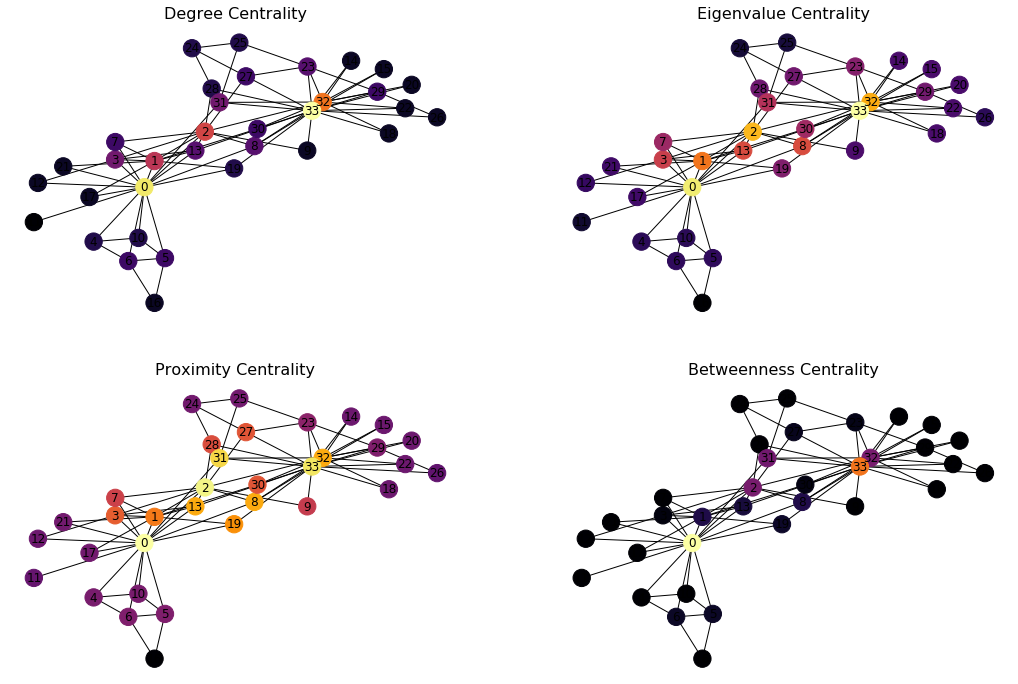

In [20]:
# Plot the centrality of the nodes
plt.figure(figsize=(18, 12))
f, axarr = plt.subplots(2, 2, num=1)

# Degree Centrality
plt.sca(axarr[0, 0])
nx.draw(G_karate, cmap=plt.get_cmap("inferno"), node_color=c_degree, node_size=300, pos=pos, with_labels=True)
axarr[0, 0].set_title("Degree Centrality", size=16)

# Eigenvalue Centrality
plt.sca(axarr[0, 1])
nx.draw(G_karate, cmap=plt.get_cmap("inferno"), node_color=c_eigenvector, node_size=300, pos=pos, with_labels=True)
axarr[0, 1].set_title("Eigenvalue Centrality", size=16)

# Proximity Centrality
plt.sca(axarr[1, 0])
nx.draw(G_karate, cmap=plt.get_cmap("inferno"), node_color=c_closeness, node_size=300, pos=pos, with_labels=True)
axarr[1, 0].set_title("Proximity Centrality", size=16)

# Betweenness Centrality
plt.sca(axarr[1, 1])
nx.draw(G_karate, cmap=plt.get_cmap("inferno"), node_color=c_betweenness, node_size=300, pos=pos, with_labels=True)
axarr[1, 1].set_title("Betweenness Centrality", size=16)

<div id='graphlearning' />

## Graph Learning

There are three main tasks in graph learning that we will cover in this section

1. Link prediction
2. Node label prediction
3. Graph embedding

<div id='lp' />

### Link Prediction

In Link Prediction, given a graph $G$, we aim to predict new edges. Predictions are useful to predict future relations or missing edges when the graph is not fully observed for example, or when new customers join a platform (e.g. a new LinkedIn user). Link prediction for a new LinkedIn user would simply be a suggestion of people he might know.

In link prediction, we simply try to build a similarity measure between pairs of nodes and link the most similar nodes. The question is now to identify and compute the right similarity scores.

<div id='ss' />

#### Similarity Scores

We can build several similarity scores for these two nodes based on their neighborhoods.

- **Common Neighbors**. 

$$ S(i,j) = ∣N(i) \cap N(j)∣ $$

- **Jaccard Coefficient**. A normalized common neighbors version

$$ S(i,j) = \frac{∣N(i) \cap N(j)∣}{∣N(i) \cup N(j)∣} $$

- **Adamic-Adar index**. For each common neighbor of nodes $i$ and $j$, we add 1 divided by the total number of neighbors of that node. The concept is that common elements with very large neighborhoods are less significant when predicting a connection between two nodes compared to elements shared between a small number of nodes.

$$ S(i,j) = \sum_{k \in (N(i) \cap N(j))} \frac{1}{log |N(k)∣} $$

- **Preferential attachment**

$$ S(i,j) = |N(i,j)| \cdot |N(j)| $$

- We can also use community information when it is available.

<div id='pm' />

#### Performance Metrics

How do we perform the evaluation of the link prediction? We must hide a subset of node pairs, and predict their links based on the rules defined above. This is the equivalent of the train-test-split in supervised learning.

We then evaluate the proportion of correct predictions for dense graphs, or use Area Under the Curve (AUC) criteria for sparse graphs.

Deleted:  19
Remaining:  59

Jaccard coefficient

(node (i), node (j), score)

(0, 2, 0.2)
(0, 3, 0.14285714285714285)
(0, 6, 0.16666666666666666)
(0, 9, 0.0)
(0, 13, 0.0)
(0, 14, 0.0)
(0, 15, 0.0)
(0, 16, 0.0)
(0, 18, 0.0)
(0, 20, 0.0)
(0, 22, 0.0)
(0, 23, 0.0)
(0, 24, 0.08333333333333333)
(0, 25, 0.07692307692307693)
(0, 26, 0.0)
(0, 27, 0.0)
(0, 28, 0.08333333333333333)
(0, 29, 0.0)
(0, 30, 0.07692307692307693)
(0, 32, 0.10526315789473684)
(0, 33, 0.125)
(1, 4, 0.1111111111111111)
(1, 5, 0.1111111111111111)
(1, 6, 0.0)
(1, 8, 0.2222222222222222)
(1, 9, 0.125)
(1, 10, 0.1111111111111111)
(1, 11, 0.14285714285714285)
(1, 12, 0.2857142857142857)
(1, 13, 0.25)
(1, 14, 0.0)
(1, 15, 0.0)
(1, 16, 0.0)
(1, 18, 0.0)
(1, 20, 0.0)
(1, 21, 0.14285714285714285)
(1, 22, 0.0)
(1, 23, 0.0)
(1, 24, 0.0)
(1, 25, 0.0)
(1, 26, 0.0)
(1, 27, 0.0)
(1, 28, 0.0)
(1, 29, 0.0)
(1, 31, 0.08333333333333333)
(1, 32, 0.0)
(1, 33, 0.1)
(2, 4, 0.0)
(2, 5, 0.0)
(2, 6, 0.0)
(2, 10, 0.0)
(2, 11, 0.0)
(2, 12, 0.1428571

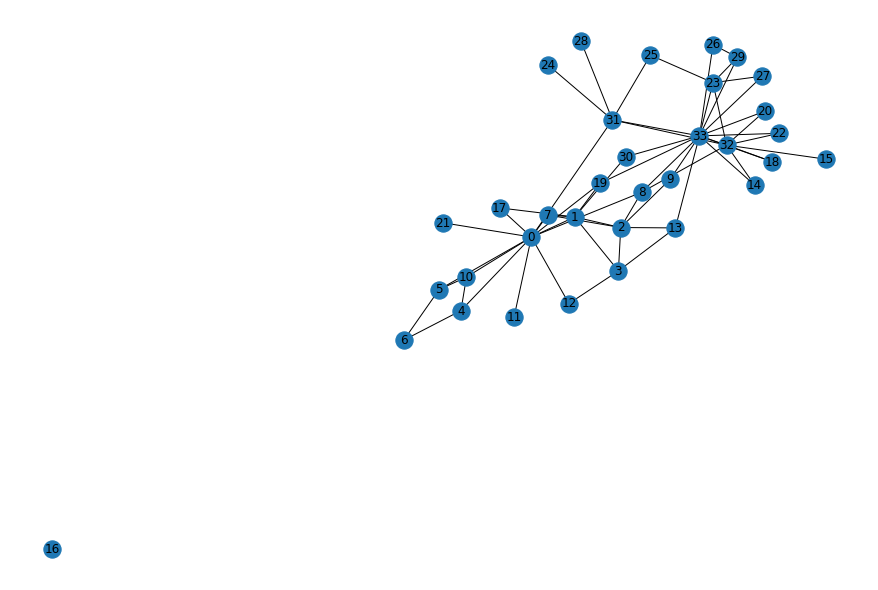

In [21]:
n = G_karate.number_of_nodes()
m = G_karate.number_of_edges()

# Take a random sample of edges
edge_subset = random.sample(G_karate.edges(), int(0.25 * G_karate.number_of_edges()))
# Remove some edges, 25%
G_karate_train = G_karate.copy()
G_karate_train.remove_edges_from(edge_subset)

edge_subset_size = len(list(edge_subset))
print("Deleted: ", str(edge_subset_size))
print("Remaining: ", str((m - edge_subset_size)))

prediction_jaccard = list(nx.jaccard_coefficient(G_karate_train))
score_jaccard, label_jaccard = zip(*[(s, (u, v) in edge_subset) for (u, v, s) in prediction_jaccard])

prediction_adamic = list(nx.adamic_adar_index(G_karate_train))
score_adamic, label_adamic = zip(*[(s, (u, v) in edge_subset) for (u, v, s) in prediction_adamic])

prediction_pref = list(nx.preferential_attachment(G_karate_train))
score_pref, label_pref = zip(*[(s, (u, v) in edge_subset) for (u, v, s) in prediction_pref])

print("\nJaccard coefficient\n")
print("(node (i), node (j), score)\n")
for j in prediction_jaccard:
    print(j)

plt.figure(figsize=(12, 8))
nx.draw(G_karate_train, with_labels=True)

<div id='nl' />

### Node Labeling

Given a graph where some nodes are not labeled, we want to predict their labels. This is in some sense a semi-supervised learning problem.

One common way to deal with such problems is to make the assumption that there is a certain smoothness on the graph. The Smoothness assumption states that points connected via a path through high-density regions on the data are likely to have similar labels. This is the main hypothesis behind the Label Propagation Algorithm.

The **Label Propagation Algorithm (LPA)** is a fast algorithm for finding communities in a graph using network structure alone as its guide, without any predefined objective function or prior information about the communities.

A single label can quickly become dominant in a densely connected group of nodes, but it will have trouble crossing a sparsely connected region.

How does the semi-supervised label propagation work?

First, we have some data $x_1, ..., x_k, x_{k+1}, ..., x_n \in Rp$, and labels for the first $k$ points $y_1, ..., y_k \in 1...C$. We define the initial label matrix $Y \in R(n×C)$ such that $Y_{ij} = 1$ if $x_i$ has label $y_i=j$ and 0 otherwise. The algorithm will generate a prediction matrix $F \in R(n×C)$ which we’ll detail below. Then, we predict the label of a node by finding the most likely label

$$ Y^{pred}_i = argmax_j F_{ij}$$

What is the prediction matrix $F$? The prediction matrix is a matrix $F$ that minimizes both smoothness and accuracy criteria. Therefore, there is a tradeoff to make between the smoothness and the accuracy of our result.

The problem expression is quite complex, so I won’t go into details. However, the solution is given by

$$ F = ((1 - \alpha)I + L_{sym})^{-1}Y $$

where $\alpha = \frac{1}{1+\mu}$, labels are given by $Y$ and $L_{sym}$ is the normalized laplacian matrix of the graph.

[Labeled graphs dataset](https://snap.stanford.edu/data/)

[Implementation of label propagation on networkx](https://networkx.org/documentation/latest/reference/algorithms/generated/networkx.algorithms.community.label_propagation.label_propagation_communities.html)

<div id='ge' />

### Graph Embedding

When dealing with NLP or computer vision problems, we are used to working with embeddings of images or texts in a Deep Neural Net. One of the limitations of graphs with what we have seen so far is the absence of vector features. However, we can learn an embedding of the graph.

There are several levels of embedding in a graph

- Embedding graph components (nodes, edges, features...) (`Node2Vec`)
- Embedding sub-parts of a graph or a whole graph (`Graph2Vec`)

<div id='nodeembedding' />

#### Node Embedding

We will first focus on the embedding of graph components. Several approaches are possible to embed a node or an edge. For example, [DeepWalk](http://www.perozzi.net/projects/deepwalk/) uses short random walks to learn representations for edges in graphs. We will talk about Node2Vec, a paper that was published by Aditya Grover and Jure Leskovec from Stanford University in 2016.

According to the authors, “node2vec is an algorithmic framework for representational learning on graphs. Given any graph, it can learn continuous feature representations for the nodes, which can then be used for various downstream machine learning tasks”.

The model learns low-dimensional representations for nodes by optimizing a neighborhood preserving objective, using random walks.

In [22]:
#!pip install node2vec

In [23]:
from node2vec import Node2Vec

# Pre-compute the probabilities and generate walks
node2vec = Node2Vec(G_karate, dimensions=64, walk_length=30, num_walks=200, workers=4)
model = node2vec.fit(window=10, min_count=1, batch_words=4)

# To get the vector of a node, say node 2, use get_vector
model.wv.get_vector("2")

array([ 0.33612448,  0.22280945,  0.03724613,  0.2486752 ,  0.17551142,
       -0.26040852, -0.112872  , -0.23352748,  0.55856115, -0.4455112 ,
        0.03292508, -0.12376758,  0.33193073, -0.6464439 ,  0.26065487,
        0.34032458, -0.03077481,  0.07002583,  0.12805453, -0.04581604,
        0.04870534, -0.32129124, -0.37458608,  0.60646534, -0.40204114,
       -0.1949599 ,  0.03856596,  0.4406796 , -0.25456527, -0.05974932,
        0.03940672, -0.28548822,  0.18855557,  0.21845178,  0.29595533,
        0.12048668,  0.20223875, -0.28340077, -0.00396546,  0.3026054 ,
        0.41525376, -0.13079032,  0.41962147,  0.20846628,  0.31454495,
       -0.2700038 ,  0.0833534 ,  0.13407849, -0.15427221,  0.32783034,
       -0.28663582, -0.18769722, -0.13580085,  0.45526147, -0.28011668,
       -0.35116187, -0.41852322,  0.40499282,  0.15139951, -0.5034554 ,
       -0.4158511 , -0.2894466 ,  0.01500535,  0.25269228], dtype=float32)

It has a length of 64 since we defined the dimension as 64 above. What can we do with this embedding? One of the first options is for example to identify the most similar node!

If the nodes have labels, we can train an algorithm based on the embedding and attach a label (node labeling, most similar node...)

In [24]:
model.wv.most_similar("2")

[('3', 0.7097817659378052),
 ('13', 0.6244220733642578),
 ('7', 0.5966321229934692),
 ('12', 0.5755230784416199),
 ('1', 0.41836440563201904),
 ('9', 0.3475601077079773),
 ('21', 0.31529849767684937),
 ('19', 0.29087620973587036),
 ('17', 0.24985533952713013),
 ('28', 0.20418661832809448)]

<div id='edgeembedding' />

#### Edge Embedding

Edges can also be embedded, and the embedding can be further used for classification.

In [25]:
from node2vec.edges import HadamardEmbedder

edges_embs = HadamardEmbedder(keyed_vectors=model.wv)
# Retrieve the vectors by specifying the name of the 2 linked nodes
edges_embs[("1", "2")]

array([ 0.08934622,  0.09022848,  0.02523017,  0.06033097,  0.0406349 ,
       -0.04605337, -0.03029846,  0.0425134 , -0.10415842,  0.5439216 ,
        0.01466888,  0.04286402,  0.03081648,  0.2587492 ,  0.0658297 ,
        0.07806567, -0.00067034,  0.01431611,  0.05538962,  0.00545073,
       -0.01290297,  0.19043824,  0.14601493,  0.02296062,  0.08602903,
       -0.00357972, -0.02317945,  0.22224571, -0.02653408,  0.01333635,
       -0.00247421, -0.08931848, -0.0282104 ,  0.12843724,  0.02370422,
       -0.04886529, -0.06864036, -0.04312397,  0.000721  , -0.07419822,
        0.05375373,  0.12079797,  0.40511686,  0.09904393, -0.05758196,
        0.02360848, -0.01059233, -0.08835802, -0.00756515, -0.12012613,
        0.1259534 ,  0.05705229,  0.02036452,  0.09760616,  0.0229437 ,
        0.07312874,  0.10959689,  0.3298302 ,  0.08157994,  0.25781524,
       -0.13399632,  0.14492168,  0.00122487, -0.13823847], dtype=float32)

In [26]:
edges_kv = edges_embs.as_keyed_vectors()
edges_kv.most_similar(str(("1", "2")))

Generating edge features: 100%|██████████| 595/595.0 [00:00<00:00, 32924.93it/s]


[("('1', '3')", 0.8503658771514893),
 ("('17', '2')", 0.8120062351226807),
 ("('1', '13')", 0.8026964664459229),
 ("('2', '3')", 0.7976255416870117),
 ("('1', '12')", 0.7959693074226379),
 ("('2', '21')", 0.795040488243103),
 ("('1', '7')", 0.7948359251022339),
 ("('2', '7')", 0.7888193726539612),
 ("('12', '2')", 0.7678143382072449),
 ("('1', '1')", 0.7402241230010986)]

<div id='graphembedding' />

#### Graph Embedding

There are also ways to embed a graph or a sub-graph directly. This approach has been developed in the `Graph2Vec` paper and is useful to represent graphs or sub-graphs as vectors, thus allowing graph classification or graph similarity measures for example. I won’t dive deeper into this technique, but feel free to check the Github of this [project](https://github.com/benedekrozemberczki/graph2vec)

<div id='gcn' />

## Graph Convolutional Networks

Machine learning on graphs is a difficult task due to the highly complex, but also informative graph structure. Graph Convolutional Networks (GCNs) are a powerful type of neural network designed to work directly on graphs and leverage their structural information. In fact, they are so powerful that even a randomly initiated 2-layer GCN can produce useful feature representations of nodes in networks.

More formally, a graph convolutional network (GCN) is a neural network that operates on graphs. Given a graph $G = (V,E)$, a GCN takes as input

1. an input feature matrix $X(N × F^0)$ feature matrix, where $N$ is the number of nodes and $F^0$ is the number of input features for each node.
2. an $N × N$ matrix representation of the graph structure such as the adjacency matrix $A$ of $G$

A hidden layer in the GCN can thus be written as $H_i = f(H_{i-1}, A)$ where $H_0 = X$ and $f$ is a propagation. Each layer $H_i$ corresponds to an $N × F^i$ feature matrix where each row is a feature representation of a node. At each layer, these features are aggregated to form the next layer’s features using the propagation rule $f$. In this way, features become increasingly more abstract at each consecutive layer. In this framework, variants of GCN differ only in the choice of propagation rule $f$

<div id='gcnexample' />

#### A Simple Propagation Rule

One of the simplest possible propagation rule is

$$ f(H_i, A) = \sigma(A H_i W_i) $$

where $W_i$ is the weight matrix for layer $i$ and $\sigma$ is a non-linear activation function such as the ReLU function. The weight matrix has dimensions $F^i × F^{i+1}$; in other words the size of the second dimension of the weight matrix determines the number of features at the next layer. If you are familiar with convolutional neural networks, this operation is similar to a filtering operation since these weights are shared across nodes in the graph.

Let’s examine the propagation rule at its most simple level. Let $i=1$, $f$ a function of the input feature matrix, $\sigma$ the identity function and choose weights as $AH_0 W_0 = AXW_0 = AX$. In other words, $f(X, A) = AX$. This propagation rule is perhaps a bit too simple, but we will add in the missing parts later. As a side note, $AX$ is now equivalent to the input layer of a multi-layer perceptron.

In [27]:
# Simple example
# Adjacency matrix representation of a graph
A = np.matrix([
    [0, 1, 0, 0],
    [0, 0, 1, 1], 
    [0, 1, 0, 0],
    [1, 0, 1, 0]],
    dtype=float)
# Feeatures. We generate 2 integer features for every node based on its index
X = np.matrix([
            [i, -i]
            for i in range(A.shape[0])
        ], dtype=float)

# Applying the Propagation Rule
A * X

matrix([[ 1., -1.],
        [ 5., -5.],
        [ 1., -1.],
        [ 2., -2.]])

What happened? The representation of each node (each row) is now a sum of its neighbors features! In other words, the graph convolutional layer represents each node as an aggregate of its neighborhood.

You may have already spotted the problems:

1. The aggregated representation of a node does not include its own features! The representation is an aggregate of the features of neighbor nodes, so only nodes that has a self-loop will include their own features in the aggregate.

2. Nodes with large degrees will have large values in their feature representation while nodes with small degrees will have small values. This can cause vanishing or exploding gradients, but is also problematic for stochastic gradient descent algorithms which are typically used to train such networks and are sensitive to the scale (or range of values) of each of the input features.

##### 1. Adding Self-Loops

To address the first problem, one can simply add a self-loop to each node. In practice this is done by adding the identity matrix $I$ to the adjacency matrix $A$ before applying the propagation rule.

##### 2. Normalizing the Feature Representations

The feature representations can be normalized by node degree by transforming the adjacency matrix $A$ by multiplying it with the inverse degree matrix $D$. Thus our simplified propagation rule looks like this

$$ f(X,A) = D^{-1} AX $$

or more specific

$$ f(H_i, A) = \sigma(D^{-1}(A+I)H_i W_i) $$

where $D^{-1}$ is the inverse degree matrix of $(A+I)$

In [28]:
# Simple example of a complete hidden layer with adjacency matrix, input features, weights and activation function
# Adjacency matrix representation of a graph
A = np.matrix([
    [0, 1, 0, 0],
    [0, 0, 1, 1], 
    [0, 1, 0, 0],
    [1, 0, 1, 0]],
    dtype=float)
#  Adding Self-Loops
I = np.matrix(np.eye(A.shape[0]))
A_hat = A + I
# Feeatures. We generate 2 integer features for every node based on its index
X = np.matrix([
            [i, -i]
            for i in range(A.shape[0])
        ], dtype=float)

# Normalizing the Feature Representations
D_hat = np.array(np.sum(A_hat, axis=0))[0]
D_hat = np.matrix(np.diag(D_hat))

# Weigths
W = np.matrix([
             [1, -1],
             [-1, 1]
         ])

def relu(X):
    return np.maximum(0, X)

# Applying the Propagation Rule
relu(D_hat**-1 * A_hat * X * W)

matrix([[1., 0.],
        [4., 0.],
        [2., 0.],
        [5., 0.]])

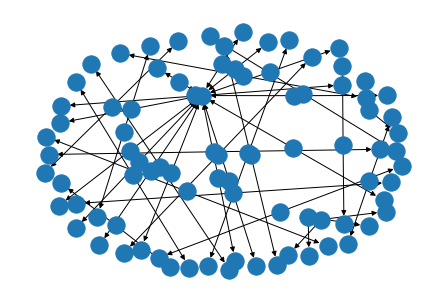

In [29]:
# GCN for G_karate graph

order = sorted(list(G_karate.nodes()))

A = nx.to_numpy_matrix(G_karate, nodelist=order)
I = np.eye(G_karate.number_of_nodes())

A_hat = A + I
D_hat = np.array(np.sum(A_hat, axis=0))[0]
D_hat = np.matrix(np.diag(D_hat))

# Initialize weights randomly
W_1 = np.random.normal(loc=0, scale=1, size=(G_karate.number_of_nodes(), 4))
W_2 = np.random.normal(loc=0, size=(W_1.shape[1], 2))

# Stack the GCN layers
# We here use just the identity matrix as feature representation
# each node is represented as a one-hot encoded categorical variable

def relu(X):
    return np.maximum(0, X)

def gcn_layer(A_hat, D_hat, X, W):
    return relu(D_hat**-1 * A_hat * X * W)

H_1 = gcn_layer(A_hat, D_hat, I, W_1)
H_2 = gcn_layer(A_hat, D_hat, H_1, W_2)
output = H_2

# Extract the feature representations
feature_representations = {node: np.array(output)[node] for node in G_karate.nodes()}

g = nx.DiGraph()
g.add_nodes_from(feature_representations.keys())
for k, v in feature_representations.items():
    g.add_edges_from(([(k, t) for t in v]))
nx.draw(g)

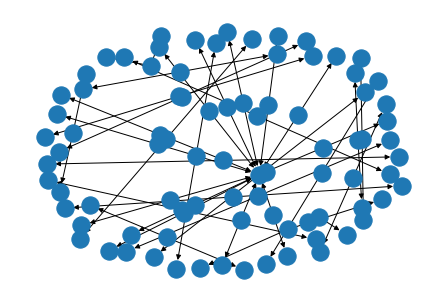

In [30]:
g2 = nx.DiGraph(feature_representations)
nx.draw(g2)